In [2]:
#loading the data frames
import pandas as pd

benin = pd.read_csv("data/benin_clean.csv")
sierra_leone = pd.read_csv("data/sierraleone_clean.csv")
togo = pd.read_csv("data/togo_clean.csv")

benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra_leone, togo], ignore_index=True)


C:\Users\aweso\AppData\Local\Temp\ipykernel_53132\91590900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2', ax=axs[i])
C:\Users\aweso\AppData\Local\Temp\ipykernel_53132\91590900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2', ax=axs[i])
C:\Users\aweso\AppData\Local\Temp\ipykernel_53132\91590900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2', ax=axs[i])


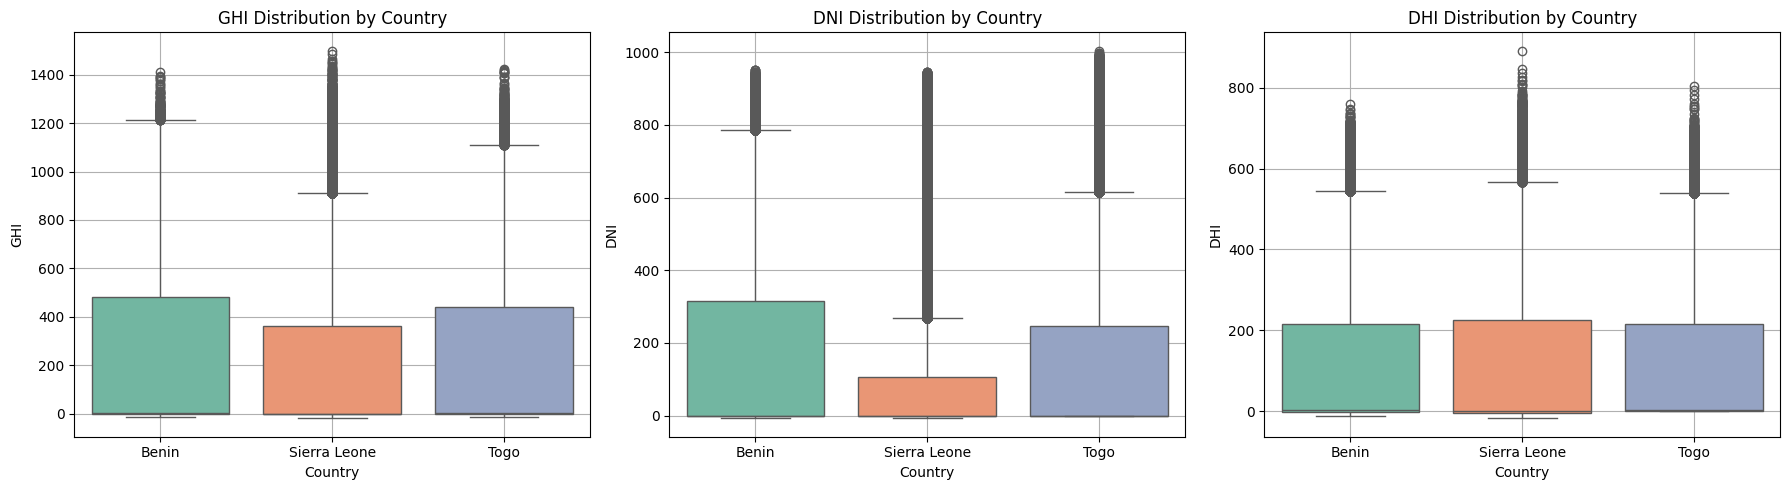

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    sns.boxplot(x='Country', y=metric, data=df, palette='Set2', ax=axs[i])
    axs[i].set_title(f'{metric} Distribution by Country')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [5]:
# the summary table
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [6]:
# the one-way ANOVA test
from scipy.stats import f_oneway, kruskal

# ANOVA
anova_result = f_oneway(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)
print(f"ANOVA p-value: {anova_result.pvalue:.5f}")

# Kruskal-Wallis (non-parametric)
kw_result = kruskal(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)
print(f"Kruskal-Wallis p-value: {kw_result.pvalue:.5f}")


ANOVA p-value: 0.00000
Kruskal-Wallis p-value: 0.00000


- Sierra Leone shows the highest **median GHI**, suggesting strong consistent solar potential.
- Togo has the **highest variability** in GHI, indicating fluctuating solar availability.
- Benin’s **average DNI** is the lowest, possibly impacting concentrated solar technologies.


C:\Users\aweso\AppData\Local\Temp\ipykernel_53132\1589671069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')


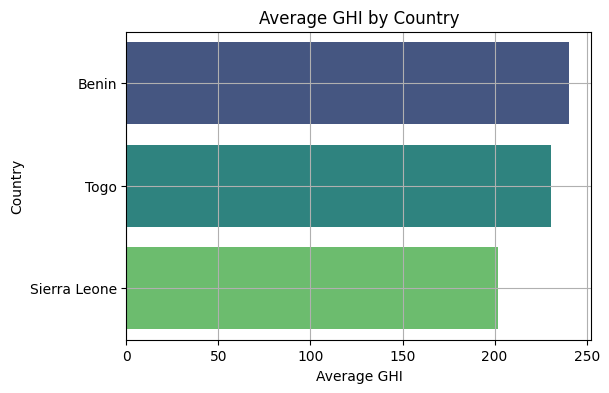

In [7]:
# countries ranking by average GHI
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')
plt.title('Average GHI by Country')
plt.xlabel('Average GHI')
plt.ylabel('Country')
plt.grid(True)
plt.show()
